In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import math
import random
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


In [98]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [99]:
def rmsle_loss(y_pred, y_true):
    return K.sqrt(K.mean(K.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))))

In [100]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [106]:
def lstm_univariate_loop(dataset):
    
    random.seed(1)
    dataset = df.values
    dataset = df.astype('float32')
    
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    print('Spliting into train and test')
    train_size = int(33600)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    testY_copy = testY.copy()
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    print('Creating and fitting the LSTM network')
    
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss=rmsle_loss, optimizer='adam', metrics = [rmsle_loss])
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    model.fit(trainX, trainY, epochs=15, batch_size=70,validation_split=0.04, verbose=1, shuffle=False, callbacks = [es])
    
    
    
    
    
    # make predictions
    print('Making predictions')
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    #Metrics
    print('Calculating metrics')
    rmsle_i = rmsle(testY_copy,testPredict)
    
    return rmsle_i

In [107]:
# load the dataset
path = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std"
all_files = glob.glob(path + "/*.csv")

i = 0
rmsle_t = []
for filename in all_files:
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)) + str(filename))
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True)
    rmsle_i = lstm_univariate_loop(df)
    rmsle_t.append(round(rmsle_i,3))
    

filename number 1 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC000102.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 78us/step - loss: 0.0285 - rmsle_loss: 0.0285 - val_loss: 0.0496 - val_rmsle_loss: 0.0532
Epoch 2/15
32252/32252 [==============================] - 2s 58us/step - loss: 0.0267 - rmsle_loss: 0.0267 - val_loss: 0.0494 - val_rmsle_loss: 0.0529
Epoch 3/15
32252/32252 [==============================] - 2s 62us/step - loss: 0.0266 - rmsle_loss: 0.0267 - val_loss: 0.0494 - val_rmsle_loss: 0.0529
Epoch 4/15
32252/32252 [==============================] - 2s 75us/step - loss: 0.0266 - rmsle_loss: 0.0266 - val_loss: 0.0493 - val_rmsle_loss: 0.0528
Epoch 5/15
32252/32252 [==============================] - 2s 65us/step - loss: 0.0266 - rmsle_loss: 0.0266 - val_loss:

32252/32252 [==============================] - 3s 79us/step - loss: 0.0449 - rmsle_loss: 0.0449 - val_loss: 0.0522 - val_rmsle_loss: 0.0521
Epoch 10/15
32252/32252 [==============================] - 3s 82us/step - loss: 0.0449 - rmsle_loss: 0.0449 - val_loss: 0.0521 - val_rmsle_loss: 0.0521
Epoch 11/15
32252/32252 [==============================] - 3s 93us/step - loss: 0.0449 - rmsle_loss: 0.0449 - val_loss: 0.0521 - val_rmsle_loss: 0.0521
Epoch 12/15
32252/32252 [==============================] - 3s 79us/step - loss: 0.0448 - rmsle_loss: 0.0448 - val_loss: 0.0521 - val_rmsle_loss: 0.0520
Epoch 13/15
32252/32252 [==============================] - 3s 94us/step - loss: 0.0448 - rmsle_loss: 0.0448 - val_loss: 0.0520 - val_rmsle_loss: 0.0520
Epoch 14/15
32252/32252 [==============================] - 3s 83us/step - loss: 0.0447 - rmsle_loss: 0.0447 - val_loss: 0.0520 - val_rmsle_loss: 0.0520
Epoch 15/15
32252/32252 [==============================] - 3s 87us/step - loss: 0.0447 - rmsle_loss:

32252/32252 [==============================] - 2s 77us/step - loss: 0.0414 - rmsle_loss: 0.0414 - val_loss: 0.0405 - val_rmsle_loss: 0.0408
Epoch 7/15
32252/32252 [==============================] - 3s 85us/step - loss: 0.0413 - rmsle_loss: 0.0413 - val_loss: 0.0404 - val_rmsle_loss: 0.0407
Epoch 8/15
32252/32252 [==============================] - 3s 78us/step - loss: 0.0412 - rmsle_loss: 0.0412 - val_loss: 0.0403 - val_rmsle_loss: 0.0406
Epoch 9/15
32252/32252 [==============================] - 3s 87us/step - loss: 0.0412 - rmsle_loss: 0.0412 - val_loss: 0.0402 - val_rmsle_loss: 0.0406
Epoch 10/15
32252/32252 [==============================] - 2s 75us/step - loss: 0.0411 - rmsle_loss: 0.0411 - val_loss: 0.0402 - val_rmsle_loss: 0.0405
Epoch 11/15
32252/32252 [==============================] - 3s 84us/step - loss: 0.0411 - rmsle_loss: 0.0411 - val_loss: 0.0402 - val_rmsle_loss: 0.0405
Epoch 12/15
32252/32252 [==============================] - 3s 83us/step - loss: 0.0411 - rmsle_loss: 0.

32252/32252 [==============================] - 4s 118us/step - loss: 0.0598 - rmsle_loss: 0.0598 - val_loss: 0.0545 - val_rmsle_loss: 0.0546
Epoch 2/15
32252/32252 [==============================] - 2s 73us/step - loss: 0.0532 - rmsle_loss: 0.0532 - val_loss: 0.0542 - val_rmsle_loss: 0.0543
Epoch 3/15
32252/32252 [==============================] - 2s 72us/step - loss: 0.0530 - rmsle_loss: 0.0530 - val_loss: 0.0540 - val_rmsle_loss: 0.0541
Epoch 4/15
32252/32252 [==============================] - 3s 78us/step - loss: 0.0528 - rmsle_loss: 0.0529 - val_loss: 0.0539 - val_rmsle_loss: 0.0540
Epoch 5/15
32252/32252 [==============================] - 3s 78us/step - loss: 0.0528 - rmsle_loss: 0.0528 - val_loss: 0.0539 - val_rmsle_loss: 0.0539
Epoch 6/15
32252/32252 [==============================] - 2s 74us/step - loss: 0.0527 - rmsle_loss: 0.0528 - val_loss: 0.0538 - val_rmsle_loss: 0.0538
Epoch 7/15
32252/32252 [==============================] - 2s 77us/step - loss: 0.0527 - rmsle_loss: 0.05

Epoch 11/15
32252/32252 [==============================] - 2s 59us/step - loss: 0.0507 - rmsle_loss: 0.0507 - val_loss: 0.0565 - val_rmsle_loss: 0.0577
Epoch 12/15
32252/32252 [==============================] - 3s 79us/step - loss: 0.0507 - rmsle_loss: 0.0507 - val_loss: 0.0564 - val_rmsle_loss: 0.0577
Epoch 13/15
32252/32252 [==============================] - 2s 76us/step - loss: 0.0506 - rmsle_loss: 0.0506 - val_loss: 0.0564 - val_rmsle_loss: 0.0576
Epoch 14/15
32252/32252 [==============================] - 2s 65us/step - loss: 0.0506 - rmsle_loss: 0.0506 - val_loss: 0.0563 - val_rmsle_loss: 0.0576
Epoch 15/15
32252/32252 [==============================] - 2s 66us/step - loss: 0.0506 - rmsle_loss: 0.0506 - val_loss: 0.0563 - val_rmsle_loss: 0.0575
Making predictions
Calculating metrics
filename number 17 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC004566.csv
Spliting into train and test
Creating 

Epoch 14/15
32252/32252 [==============================] - 2s 70us/step - loss: 0.0202 - rmsle_loss: 0.0202 - val_loss: 0.0245 - val_rmsle_loss: 0.0238
Epoch 15/15
32252/32252 [==============================] - 2s 68us/step - loss: 0.0202 - rmsle_loss: 0.0202 - val_loss: 0.0244 - val_rmsle_loss: 0.0238
Making predictions
Calculating metrics
filename number 20 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC000029.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 5s 145us/step - loss: 0.0339 - rmsle_loss: 0.0339 - val_loss: 0.0323 - val_rmsle_loss: 0.0317
Epoch 2/15
32252/32252 [==============================] - 4s 119us/step - loss: 0.0323 - rmsle_loss: 0.0323 - val_loss: 0.0323 - val_rmsle_loss: 0.0318
Epoch 00002: early stopping
Making predictions
Calculating metrics
filenam

Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 4s 129us/step - loss: 0.0668 - rmsle_loss: 0.0668 - val_loss: 0.0817 - val_rmsle_loss: 0.0826
Epoch 2/15
32252/32252 [==============================] - 2s 67us/step - loss: 0.0637 - rmsle_loss: 0.0637 - val_loss: 0.0816 - val_rmsle_loss: 0.0825
Epoch 3/15
32252/32252 [==============================] - 2s 62us/step - loss: 0.0637 - rmsle_loss: 0.0637 - val_loss: 0.0815 - val_rmsle_loss: 0.0824
Epoch 4/15
32252/32252 [==============================] - 2s 67us/step - loss: 0.0637 - rmsle_loss: 0.0637 - val_loss: 0.0815 - val_rmsle_loss: 0.0824
Epoch 5/15
32252/32252 [==============================] - 2s 63us/step - loss: 0.0637 - rmsle_loss: 0.0637 - val_loss: 0.0815 - val_rmsle_loss: 0.0824
Epoch 6/15
32252/32252 [==============================] - 2s 67us/step - loss: 0.0637 - rmsle_loss: 0.0637 - val_loss: 0.0814 - val_rmsle_loss: 0.0823
Epoch 

32252/32252 [==============================] - 3s 95us/step - loss: 0.0444 - rmsle_loss: 0.0444 - val_loss: 0.0424 - val_rmsle_loss: 0.0419
Making predictions
Calculating metrics
filename number 28 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC004847.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 2s 71us/step - loss: 0.0486 - rmsle_loss: 0.0486 - val_loss: 0.0397 - val_rmsle_loss: 0.0396
Epoch 2/15
32252/32252 [==============================] - 2s 47us/step - loss: 0.0478 - rmsle_loss: 0.0478 - val_loss: 0.0395 - val_rmsle_loss: 0.0395
Epoch 3/15
32252/32252 [==============================] - 2s 51us/step - loss: 0.0476 - rmsle_loss: 0.0476 - val_loss: 0.0393 - val_rmsle_loss: 0.0393
Epoch 4/15
32252/32252 [==============================] - 2s 48us/step - loss: 0.0473 - r

32252/32252 [==============================] - 3s 106us/step - loss: 0.0540 - rmsle_loss: 0.0539 - val_loss: 0.0448 - val_rmsle_loss: 0.0439
Epoch 2/15
32252/32252 [==============================] - 2s 68us/step - loss: 0.0516 - rmsle_loss: 0.0516 - val_loss: 0.0449 - val_rmsle_loss: 0.0440
Epoch 00002: early stopping
Making predictions
Calculating metrics
filename number 32 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC004507.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 106us/step - loss: 0.0420 - rmsle_loss: 0.0420 - val_loss: 0.0371 - val_rmsle_loss: 0.0406
Epoch 2/15
32252/32252 [==============================] - 2s 67us/step - loss: 0.0396 - rmsle_loss: 0.0396 - val_loss: 0.0362 - val_rmsle_loss: 0.0397
Epoch 3/15
32252/32252 [==============================] - 2

Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 99us/step - loss: 0.0460 - rmsle_loss: 0.0460 - val_loss: 0.0401 - val_rmsle_loss: 0.0412
Epoch 2/15
32252/32252 [==============================] - 2s 70us/step - loss: 0.0415 - rmsle_loss: 0.0416 - val_loss: 0.0394 - val_rmsle_loss: 0.0407
Epoch 3/15
32252/32252 [==============================] - 2s 70us/step - loss: 0.0412 - rmsle_loss: 0.0412 - val_loss: 0.0393 - val_rmsle_loss: 0.0408
Epoch 4/15
32252/32252 [==============================] - 2s 64us/step - loss: 0.0409 - rmsle_loss: 0.0409 - val_loss: 0.0394 - val_rmsle_loss: 0.0411
Epoch 00004: early stopping
Making predictions
Calculating metrics
filename number 37 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC000212.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 322

Epoch 10/15
32252/32252 [==============================] - 3s 84us/step - loss: 0.0536 - rmsle_loss: 0.0536 - val_loss: 0.0556 - val_rmsle_loss: 0.0574
Epoch 11/15
32252/32252 [==============================] - 2s 71us/step - loss: 0.0536 - rmsle_loss: 0.0536 - val_loss: 0.0556 - val_rmsle_loss: 0.0574
Epoch 12/15
32252/32252 [==============================] - 2s 58us/step - loss: 0.0535 - rmsle_loss: 0.0535 - val_loss: 0.0555 - val_rmsle_loss: 0.0573
Epoch 13/15
32252/32252 [==============================] - ETA: 0s - loss: 0.0535 - rmsle_loss: 0.05 - 2s 59us/step - loss: 0.0535 - rmsle_loss: 0.0535 - val_loss: 0.0555 - val_rmsle_loss: 0.0573
Epoch 14/15
32252/32252 [==============================] - 2s 59us/step - loss: 0.0535 - rmsle_loss: 0.0535 - val_loss: 0.0554 - val_rmsle_loss: 0.0572
Epoch 15/15
32252/32252 [==============================] - 2s 58us/step - loss: 0.0535 - rmsle_loss: 0.0535 - val_loss: 0.0554 - val_rmsle_loss: 0.0572
Making predictions
Calculating metrics
filen

32252/32252 [==============================] - 2s 61us/step - loss: 0.0331 - rmsle_loss: 0.0331 - val_loss: 0.0323 - val_rmsle_loss: 0.0319
Epoch 7/15
32252/32252 [==============================] - 2s 61us/step - loss: 0.0330 - rmsle_loss: 0.0330 - val_loss: 0.0322 - val_rmsle_loss: 0.0319
Epoch 8/15
32252/32252 [==============================] - 2s 60us/step - loss: 0.0330 - rmsle_loss: 0.0330 - val_loss: 0.0322 - val_rmsle_loss: 0.0318
Epoch 9/15
32252/32252 [==============================] - 2s 62us/step - loss: 0.0330 - rmsle_loss: 0.0330 - val_loss: 0.0322 - val_rmsle_loss: 0.0318
Epoch 10/15
32252/32252 [==============================] - 2s 61us/step - loss: 0.0329 - rmsle_loss: 0.0329 - val_loss: 0.0322 - val_rmsle_loss: 0.0318
Epoch 11/15
32252/32252 [==============================] - 2s 62us/step - loss: 0.0329 - rmsle_loss: 0.0329 - val_loss: 0.0322 - val_rmsle_loss: 0.0318
Epoch 12/15
32252/32252 [==============================] - 2s 61us/step - loss: 0.0329 - rmsle_loss: 0.

Making predictions
Calculating metrics
filename number 53 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC000230.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 99us/step - loss: 0.0639 - rmsle_loss: 0.0639 - val_loss: 0.0619 - val_rmsle_loss: 0.0642
Epoch 2/15
32252/32252 [==============================] - 2s 64us/step - loss: 0.0599 - rmsle_loss: 0.0599 - val_loss: 0.0614 - val_rmsle_loss: 0.0637
Epoch 3/15
32252/32252 [==============================] - 2s 65us/step - loss: 0.0595 - rmsle_loss: 0.0595 - val_loss: 0.0611 - val_rmsle_loss: 0.0635
Epoch 4/15
32252/32252 [==============================] - 2s 64us/step - loss: 0.0593 - rmsle_loss: 0.0593 - val_loss: 0.0610 - val_rmsle_loss: 0.0634
Epoch 5/15
32252/32252 [==============================] - 2s 65us/step - loss:

32252/32252 [==============================] - 2s 63us/step - loss: 0.0573 - rmsle_loss: 0.0573 - val_loss: 0.0587 - val_rmsle_loss: 0.0586
Epoch 12/15
32252/32252 [==============================] - 2s 63us/step - loss: 0.0573 - rmsle_loss: 0.0573 - val_loss: 0.0587 - val_rmsle_loss: 0.0586
Epoch 13/15
32252/32252 [==============================] - 2s 64us/step - loss: 0.0572 - rmsle_loss: 0.0572 - val_loss: 0.0587 - val_rmsle_loss: 0.0585
Epoch 14/15
32252/32252 [==============================] - 2s 63us/step - loss: 0.0572 - rmsle_loss: 0.0572 - val_loss: 0.0587 - val_rmsle_loss: 0.0585
Epoch 15/15
32252/32252 [==============================] - 2s 63us/step - loss: 0.0572 - rmsle_loss: 0.0572 - val_loss: 0.0586 - val_rmsle_loss: 0.0585
Making predictions
Calculating metrics
filename number 58 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC004490.csv
Spliting into train and test
Creating and fitting 

Epoch 14/15
32252/32252 [==============================] - 2s 57us/step - loss: 0.0171 - rmsle_loss: 0.0171 - val_loss: 0.0181 - val_rmsle_loss: 0.0180
Epoch 15/15
32252/32252 [==============================] - 2s 55us/step - loss: 0.0171 - rmsle_loss: 0.0171 - val_loss: 0.0181 - val_rmsle_loss: 0.0180
Making predictions
Calculating metrics
filename number 61 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC000227.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 92us/step - loss: 0.0428 - rmsle_loss: 0.0428 - val_loss: 0.0401 - val_rmsle_loss: 0.0404
Epoch 2/15
32252/32252 [==============================] - 2s 69us/step - loss: 0.0394 - rmsle_loss: 0.0394 - val_loss: 0.0398 - val_rmsle_loss: 0.0401
Epoch 3/15
32252/32252 [==============================] - 2s 70us/step - los

Calculating metrics
filename number 65 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC004861.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 9s 272us/step - loss: 0.0604 - rmsle_loss: 0.0604 - val_loss: 0.0650 - val_rmsle_loss: 0.0638
Epoch 2/15
32252/32252 [==============================] - 2s 69us/step - loss: 0.0575 - rmsle_loss: 0.0575 - val_loss: 0.0649 - val_rmsle_loss: 0.0636
Epoch 3/15
32252/32252 [==============================] - 2s 68us/step - loss: 0.0575 - rmsle_loss: 0.0575 - val_loss: 0.0648 - val_rmsle_loss: 0.0636
Epoch 4/15
32252/32252 [==============================] - 2s 70us/step - loss: 0.0574 - rmsle_loss: 0.0574 - val_loss: 0.0648 - val_rmsle_loss: 0.0636
Epoch 5/15
32252/32252 [==============================] - 2s 77us/step - loss: 0.0574 - rmsle_lo

Epoch 8/15
32252/32252 [==============================] - 2s 55us/step - loss: 0.0500 - rmsle_loss: 0.0500 - val_loss: 0.0483 - val_rmsle_loss: 0.0491
Epoch 9/15
32252/32252 [==============================] - 2s 56us/step - loss: 0.0500 - rmsle_loss: 0.0500 - val_loss: 0.0482 - val_rmsle_loss: 0.0490
Epoch 10/15
32252/32252 [==============================] - 2s 54us/step - loss: 0.0500 - rmsle_loss: 0.0500 - val_loss: 0.0482 - val_rmsle_loss: 0.0490
Epoch 11/15
32252/32252 [==============================] - 2s 55us/step - loss: 0.0500 - rmsle_loss: 0.0500 - val_loss: 0.0482 - val_rmsle_loss: 0.0490
Epoch 12/15
32252/32252 [==============================] - 2s 54us/step - loss: 0.0500 - rmsle_loss: 0.0500 - val_loss: 0.0482 - val_rmsle_loss: 0.0490
Epoch 13/15
32252/32252 [==============================] - 2s 60us/step - loss: 0.0500 - rmsle_loss: 0.0500 - val_loss: 0.0482 - val_rmsle_loss: 0.0490
Epoch 14/15
32252/32252 [==============================] - 2s 55us/step - loss: 0.0500 - r

Epoch 11/15
32252/32252 [==============================] - 3s 78us/step - loss: 0.0440 - rmsle_loss: 0.0440 - val_loss: 0.0439 - val_rmsle_loss: 0.0427
Epoch 12/15
32252/32252 [==============================] - 2s 57us/step - loss: 0.0440 - rmsle_loss: 0.0439 - val_loss: 0.0438 - val_rmsle_loss: 0.0427
Epoch 13/15
32252/32252 [==============================] - 2s 54us/step - loss: 0.0439 - rmsle_loss: 0.0439 - val_loss: 0.0438 - val_rmsle_loss: 0.0427
Epoch 14/15
32252/32252 [==============================] - 2s 56us/step - loss: 0.0439 - rmsle_loss: 0.0439 - val_loss: 0.0438 - val_rmsle_loss: 0.0427
Epoch 15/15
32252/32252 [==============================] - 2s 64us/step - loss: 0.0439 - rmsle_loss: 0.0439 - val_loss: 0.0438 - val_rmsle_loss: 0.0427
Making predictions
Calculating metrics
filename number 72 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC000056.csv
Spliting into train and test
Creating 

32252/32252 [==============================] - 2s 57us/step - loss: 0.0493 - rmsle_loss: 0.0493 - val_loss: 0.0593 - val_rmsle_loss: 0.0590
Epoch 00013: early stopping
Making predictions
Calculating metrics
filename number 75 of 94/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/MAC004540.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 4s 131us/step - loss: 0.0462 - rmsle_loss: 0.0462 - val_loss: 0.0462 - val_rmsle_loss: 0.0478
Epoch 2/15
32252/32252 [==============================] - 3s 96us/step - loss: 0.0425 - rmsle_loss: 0.0425 - val_loss: 0.0457 - val_rmsle_loss: 0.0473
Epoch 3/15
32252/32252 [==============================] - 3s 89us/step - loss: 0.0423 - rmsle_loss: 0.0423 - val_loss: 0.0453 - val_rmsle_loss: 0.0469
Epoch 4/15
32252/32252 [==============================] - 3s

Epoch 10/15
32252/32252 [==============================] - 2s 59us/step - loss: 0.0489 - rmsle_loss: 0.0489 - val_loss: 0.0482 - val_rmsle_loss: 0.0468
Epoch 11/15
32252/32252 [==============================] - 2s 55us/step - loss: 0.0489 - rmsle_loss: 0.0489 - val_loss: 0.0482 - val_rmsle_loss: 0.0468
Epoch 12/15
32252/32252 [==============================] - 2s 54us/step - loss: 0.0489 - rmsle_loss: 0.0489 - val_loss: 0.0482 - val_rmsle_loss: 0.0468
Epoch 13/15
32252/32252 [==============================] - 2s 56us/step - loss: 0.0489 - rmsle_loss: 0.0489 - val_loss: 0.0482 - val_rmsle_loss: 0.0468
Epoch 14/15
32252/32252 [==============================] - 2s 57us/step - loss: 0.0489 - rmsle_loss: 0.0489 - val_loss: 0.0482 - val_rmsle_loss: 0.0468
Epoch 15/15
32252/32252 [==============================] - 2s 54us/step - loss: 0.0489 - rmsle_loss: 0.0489 - val_loss: 0.0482 - val_rmsle_loss: 0.0468
Making predictions
Calculating metrics
filename number 80 of 94/Users/mariabelenalberti/

Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 2s 55us/step - loss: 0.0548 - rmsle_loss: 0.0548 - val_loss: 0.0365 - val_rmsle_loss: 0.0389
Epoch 2/15
32252/32252 [==============================] - 1s 38us/step - loss: 0.0495 - rmsle_loss: 0.0495 - val_loss: 0.0363 - val_rmsle_loss: 0.0386
Epoch 3/15
32252/32252 [==============================] - 1s 38us/step - loss: 0.0489 - rmsle_loss: 0.0489 - val_loss: 0.0361 - val_rmsle_loss: 0.0383
Epoch 4/15
32252/32252 [==============================] - 1s 39us/step - loss: 0.0486 - rmsle_loss: 0.0486 - val_loss: 0.0360 - val_rmsle_loss: 0.0382
Epoch 5/15
32252/32252 [==============================] - 1s 38us/step - loss: 0.0485 - rmsle_loss: 0.0484 - val_loss: 0.0360 - val_rmsle_loss: 0.0382
Epoch 6/15
32252/32252 [==============================] - 1s 38us/step - loss: 0.0484 - rmsle_loss: 0.0484 - val_loss: 0.0361 - val_rmsle_loss: 0.0382
Epoch 00006: early stopping
Making prediction

32252/32252 [==============================] - 1s 36us/step - loss: 0.0203 - rmsle_loss: 0.0203 - val_loss: 0.0176 - val_rmsle_loss: 0.0179
Epoch 5/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0203 - rmsle_loss: 0.0203 - val_loss: 0.0176 - val_rmsle_loss: 0.0179
Epoch 6/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0202 - rmsle_loss: 0.0202 - val_loss: 0.0176 - val_rmsle_loss: 0.0178
Epoch 7/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0202 - rmsle_loss: 0.0202 - val_loss: 0.0175 - val_rmsle_loss: 0.0178
Epoch 8/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0202 - rmsle_loss: 0.0202 - val_loss: 0.0175 - val_rmsle_loss: 0.0178
Epoch 9/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0201 - rmsle_loss: 0.0201 - val_loss: 0.0175 - val_rmsle_loss: 0.0178
Epoch 10/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0201 - rmsle_loss: 0.02

32252/32252 [==============================] - 1s 36us/step - loss: 0.0319 - rmsle_loss: 0.0319 - val_loss: 0.0316 - val_rmsle_loss: 0.0314
Epoch 6/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0319 - rmsle_loss: 0.0319 - val_loss: 0.0316 - val_rmsle_loss: 0.0314
Epoch 7/15
32252/32252 [==============================] - 1s 37us/step - loss: 0.0319 - rmsle_loss: 0.0319 - val_loss: 0.0316 - val_rmsle_loss: 0.0314
Epoch 8/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0319 - rmsle_loss: 0.0319 - val_loss: 0.0316 - val_rmsle_loss: 0.0314
Epoch 9/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0318 - rmsle_loss: 0.0318 - val_loss: 0.0316 - val_rmsle_loss: 0.0314
Epoch 10/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0318 - rmsle_loss: 0.0318 - val_loss: 0.0316 - val_rmsle_loss: 0.0314
Epoch 11/15
32252/32252 [==============================] - 1s 36us/step - loss: 0.0318 - rmsle_loss: 0.0

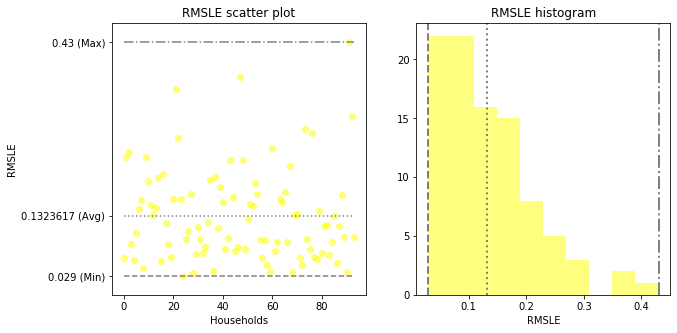

In [109]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(range(len(rmsle_t)),rmsle_t,color = 'yellow',alpha = 0.5)
plt.plot(range(len(rmsle_t)),[min(rmsle_t)]*len(rmsle_t),color = 'grey',linestyle = '--')
plt.plot(range(len(rmsle_t)),[round(np.average(rmsle_t),7)]*len(rmsle_t),color = 'grey',linestyle = ':')
plt.plot(range(len(rmsle_t)),[max(rmsle_t)]*len(rmsle_t),color = 'grey',linestyle = '-.')
plt.yticks([min(rmsle_t),round(np.average(rmsle_t),7),max(rmsle_t)],[str(min(rmsle_t)) + ' (Min)',
                                                            str(round(np.average(rmsle_t),7)) + ' (Avg)',
                                                                         str(max(rmsle_t))+' (Max)'])
plt.title('RMSLE scatter plot',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('RMSLE')

plt.subplot(122)
plt.hist(rmsle_t,color = 'yellow',alpha = 0.5)
plt.axvline(x=min(rmsle_t), color='grey', linestyle='--', linewidth=2)
plt.axvline(x=round(np.average(rmsle_t),4), color='grey', linestyle=':', linewidth=2)
plt.axvline(x=max(rmsle_t), color='grey', linestyle='-.', linewidth=2)

plt.title("RMSLE histogram",fontsize = 12)
plt.xlabel('RMSLE')
#plt.savefig('/Users/mariabelenalberti/Desktop/uni_results/RMSLE_50_adv_std')

plt.show();

In [108]:
print(round(np.average(rmsle_t),7))

0.1323617
